This notebook analyzes how likely it in the dataset for a bin to occur multiple time steps in a row for a given location. We see that in the tropics, for every bin the vast majority of the time it only stays in the bin for one timestep. This partially explains why the transitioner works better when the current eta is not included in the transitioner model (see this notebook: uwnet/stochastic_parameterization/notebooks/2019-04-16-improving-eta-transitioner.ipynb). 

The notebook also examines the distribution of which bins are transitioned to from each bin. This does indicate the dependence of the transition on the current eta state, as the transitions tend to be in a bin that is close to the current bin. 

In [1]:
from uwnet.stochastic_parameterization.utils import (
    get_dataset,
)
dir_ = '/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/'
base_model_location = dir_ + 'full_model/1.pkl'
ds_location = dir_ + 'training.nc'
data = get_dataset(
    t_start=400, 
    t_stop=500,
    base_model_location=base_model_location,
    ds_location=ds_location, 
    binning_quantiles=(0.0073, 0.0557, 0.3024, 0.5967, 0.8348, 0.9666, 1.)
).isel(y=range(28, 36)).eta

In [7]:
from collections import defaultdict
consecutive_eta_counts = defaultdict(list)
transitions = defaultdict(list)
for x in data.x:
    for y in data.y:
        etas = data.sel(x=x, y=y).values
        consecutive_eta_count = 1
        current_eta = etas[0]
        previous_eta = etas[0]
        for eta in etas[1:]:
            transitions[previous_eta].append(eta)
            previous_eta = eta
            if eta == current_eta:
                consecutive_eta_count += 1
            else:
                consecutive_eta_counts[eta].append(consecutive_eta_count)
                current_eta = eta
                consecutive_eta_count = 1

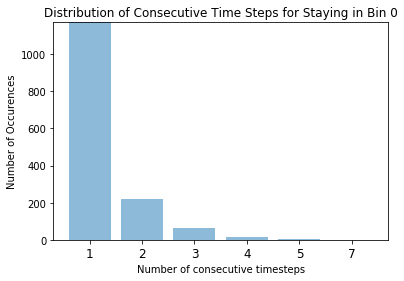

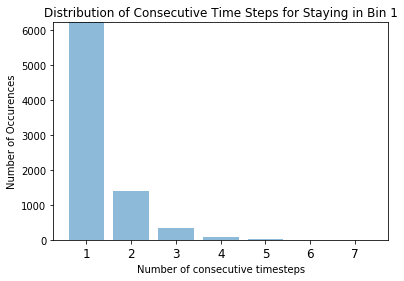

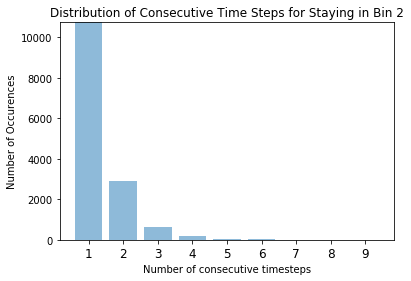

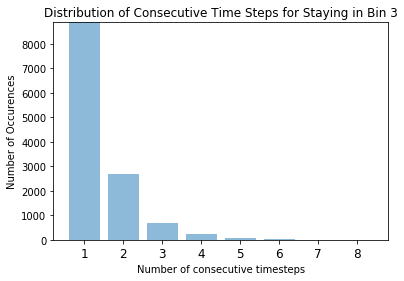

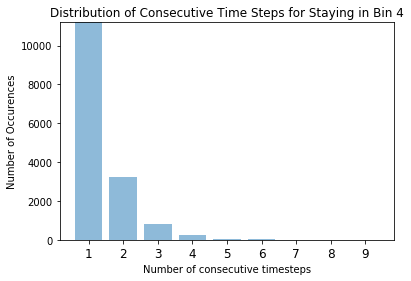

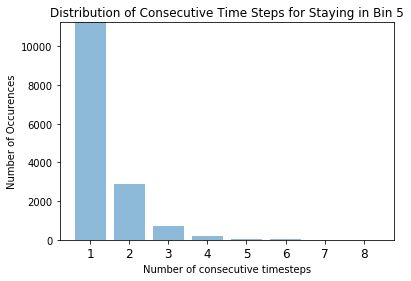

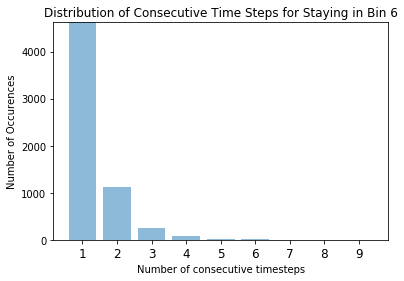

In [8]:
%matplotlib inline
from collections import Counter
from uwnet.stochastic_parameterization.graph_utils import draw_barplot
for eta in sorted(consecutive_eta_counts.keys()):
    consecutive_etas = consecutive_eta_counts[eta]
    streak_counts = Counter(consecutive_etas)
    draw_barplot(
        [streak_counts[idx] for idx in sorted(streak_counts.keys())], 
        sorted(streak_counts.keys()), 
        y_label='Number of Occurences',
        x_label='Number of consecutive timesteps',
        title='Distribution of Consecutive Time Steps for Staying in Bin ' + str(eta))

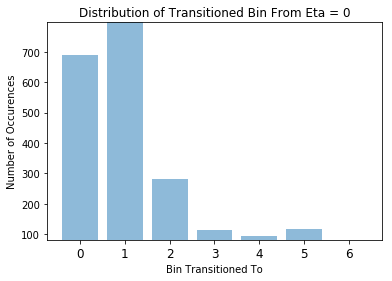

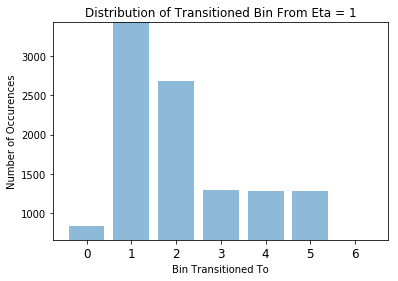

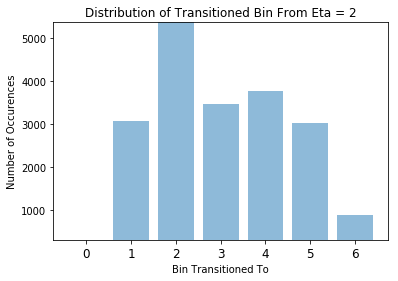

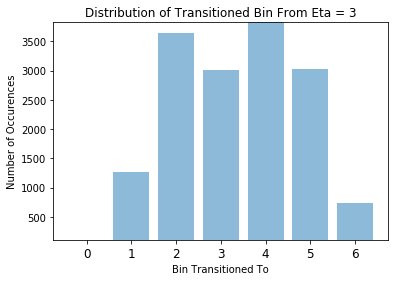

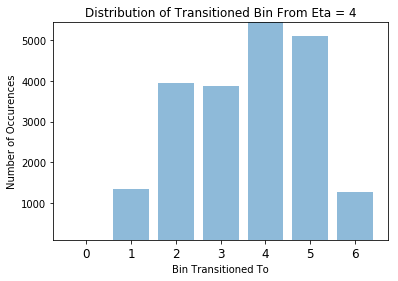

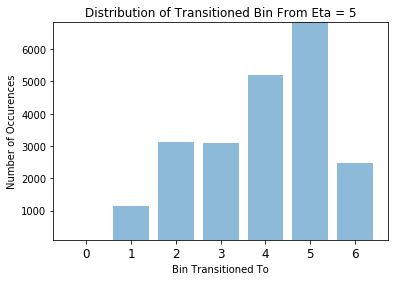

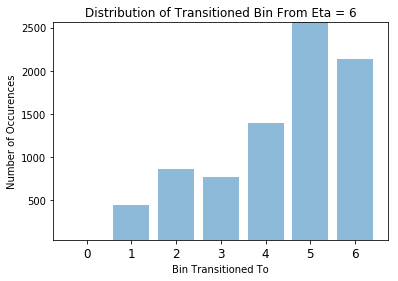

In [10]:
from uwnet.stochastic_parameterization.graph_utils import draw_barplot
for eta in sorted(transitions.keys()):
    transition_to = transitions[eta]
    streak_counts = Counter(transition_to)
    draw_barplot(
        [streak_counts[idx] for idx in sorted(streak_counts.keys())], 
        sorted(streak_counts.keys()), 
        y_label='Number of Occurences',
        x_label='Bin Transitioned To',
        title='Distribution of Transitioned Bin From Eta = ' + str(eta))